<a href="https://colab.research.google.com/github/Mekondjo-EDSA/dsi_repo/blob/master/dsi_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My Github repo

https://github.com/Mekondjo-EDSA/dsi_repo.git

In [69]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
!pwd

/content/drive/My Drive/dsi


In [72]:
#change working directory
%cd /content/drive/MyDrive/dsi

/content/drive/MyDrive/dsi


In [73]:
#Read in tsv files
ratings_df = pd.read_csv('title.ratings.tsv.gz', delimiter='\t', na_values=['\\N', 'NaN'] )
akas_df = pd.read_csv('title.akas.tsv.gz', delimiter='\t', na_values=['\\N', 'NaN'] ) 
basics_df = pd.read_csv('title.basics.tsv.gz', delimiter='\t', dtype={'runtimeMinutes': 'str'}, na_values=['\\N', 'NaN'] )

In [74]:
#rename titleId to tconst
akas_df = akas_df.rename(columns={'titleId':'tconst'})

In [75]:
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,NaN,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"


In [76]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713


In [77]:
akas_df.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
1,tt0000001,2,Карменсита,RU,NaN,NaN,NaN,0.0
2,tt0000001,3,Carmencita,US,NaN,NaN,NaN,0.0
3,tt0000001,4,Carmencita,NaN,NaN,original,NaN,1.0
4,tt0000002,1,Le clown et ses chiens,NaN,NaN,original,NaN,1.0


In [78]:
#check for and drop duplicates if any 
ratings_df.drop_duplicates(inplace = True)
basics_df.drop_duplicates(inplace = True)
akas_df.drop_duplicates(inplace=True)

In [79]:
#merge dataframes
merged_df = pd.merge(pd.merge(basics_df, ratings_df ), akas_df)

In [80]:
merged_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",5.8,1422,1,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
1,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",5.8,1422,2,Карменсита,RU,NaN,NaN,NaN,0.0
2,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",5.8,1422,3,Carmencita,US,NaN,NaN,NaN,0.0
3,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",5.8,1422,4,Carmencita,NaN,NaN,original,NaN,1.0
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short",6.4,168,1,Le clown et ses chiens,NaN,NaN,original,NaN,1.0


In [81]:
merged_df.shape

(1686547, 18)

In [82]:
#merge dataframes using an outer merge
merged_outer_df = pd.merge(pd.merge(basics_df, ratings_df, how = 'outer' ), akas_df, how = 'outer' )

In [83]:
merged_outer_df.shape

(6740089, 18)

In [84]:
#Use the unique() method to compute how many different 'titleTypes' there are 
pd.DataFrame(merged_df['titleType'].unique())

,0
0,short
1,movie
2,tvMovie
3,tvSeries
4,tvEpisode
5,tvShort
6,tvMiniSeries
7,tvSpecial
8,video
9,videoGame


In [85]:
#verify result using nunique
merged_df['titleType'].nunique()

10

In [86]:
#filter out specified rows 
df_new = merged_df[((merged_df.language == 'en') | (merged_df.region == 'US')) & (merged_df.titleType == 'movie')]

In [87]:
df_new.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance,5.5,70,3,Miss Jerry,US,NaN,NaN,NaN,0.0
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,20,"Documentary,News,Sport",5.2,266,1,The Corbett-Fitzsimmons Fight,US,NaN,NaN,NaN,0.0
1446,tt0000630,movie,Hamlet,Amleto,0,1908.0,NaN,NaN,Drama,3.1,10,4,Hamlet,US,NaN,NaN,NaN,0.0
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908.0,NaN,120,"Adventure,Fantasy",5.9,26,1,The Fairylogue and Radio-Plays,US,NaN,NaN,NaN,0.0
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910.0,NaN,NaN,Drama,5.2,16,2,"Hamlet, Prince of Denmark",US,NaN,NaN,NaN,0.0


In [88]:
df_new.shape

(160034, 18)

In [89]:
df_new['log10Votes'] = np.log10(df_new['numVotes'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df_new.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,log10Votes
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance,5.5,70,3,Miss Jerry,US,NaN,NaN,NaN,0.0,1.845098
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,20,"Documentary,News,Sport",5.2,266,1,The Corbett-Fitzsimmons Fight,US,NaN,NaN,NaN,0.0,2.424882
1446,tt0000630,movie,Hamlet,Amleto,0,1908.0,NaN,NaN,Drama,3.1,10,4,Hamlet,US,NaN,NaN,NaN,0.0,1.000000
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908.0,NaN,120,"Adventure,Fantasy",5.9,26,1,The Fairylogue and Radio-Plays,US,NaN,NaN,NaN,0.0,1.414973
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910.0,NaN,NaN,Drama,5.2,16,2,"Hamlet, Prince of Denmark",US,NaN,NaN,NaN,0.0,1.204120


In [91]:
#Lower the case of all text in the 'genres' column
df_new['genres'] = df_new['genres'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
#Using Groupby on genres using log10Votes
df_new.groupby('genres', sort=False)['log10Votes'].mean().nlargest(10)

genres
action,fantasy,war            5.405722
action,family,romance         4.801753
animation,drama,war           4.396304
family,music,musical          4.396252
documentary,sport,thriller    4.386731
action,adventure,sci-fi       4.373261
horror,musical,sci-fi         4.340484
biography,fantasy,horror      4.271842
adventure,sci-fi,thriller     4.180897
adventure,drama,sci-fi        4.123983
Name: log10Votes, dtype: float64

In [93]:
#Using Groupby on genres using averageRatings
df_new.groupby('genres', sort=False)['averageRating'].mean().nlargest(10)

genres
documentary,history,western        9.300000
history,sport                      9.200000
documentary,news,reality-tv        8.800000
animation,crime,documentary        8.525000
biography,history,music            8.500000
adventure,documentary,western      8.433333
documentary,drama,thriller         8.433333
comedy,mystery,sport               8.400000
biography,documentary,talk-show    8.300000
action,documentary,fantasy         8.300000
Name: averageRating, dtype: float64

averageRating
1.0     AxesSubplot(0.125,0.125;0.775x0.755)
1.1     AxesSubplot(0.125,0.125;0.775x0.755)
1.2     AxesSubplot(0.125,0.125;0.775x0.755)
1.3     AxesSubplot(0.125,0.125;0.775x0.755)
1.4     AxesSubplot(0.125,0.125;0.775x0.755)
                        ...                 
9.6     AxesSubplot(0.125,0.125;0.775x0.755)
9.7     AxesSubplot(0.125,0.125;0.775x0.755)
9.8     AxesSubplot(0.125,0.125;0.775x0.755)
9.9     AxesSubplot(0.125,0.125;0.775x0.755)
10.0    AxesSubplot(0.125,0.125;0.775x0.755)
Length: 91, dtype: object

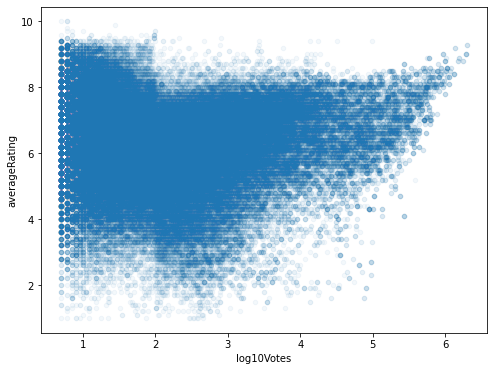

In [94]:
#Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes. 

fig, ax = plt.subplots(figsize=(8,6))

df_new.groupby('averageRating').plot(kind='scatter', x = "log10Votes", y = "averageRating", ax=ax, alpha = 1/20)

averageRating
1.2    AxesSubplot(0.125,0.125;0.775x0.755)
1.5    AxesSubplot(0.125,0.125;0.775x0.755)
1.8    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.2    AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
9.0    AxesSubplot(0.125,0.125;0.775x0.755)
9.1    AxesSubplot(0.125,0.125;0.775x0.755)
9.2    AxesSubplot(0.125,0.125;0.775x0.755)
9.4    AxesSubplot(0.125,0.125;0.775x0.755)
9.5    AxesSubplot(0.125,0.125;0.775x0.755)
Length: 76, dtype: object

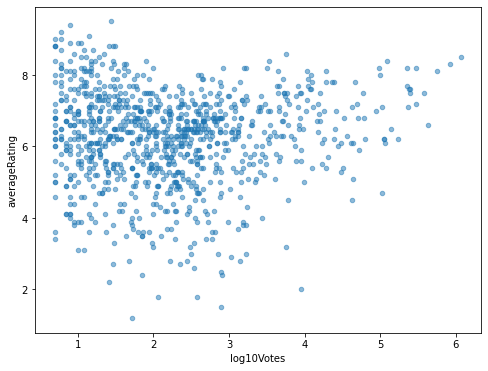

In [95]:
#sampled data and introduced transparency to minimize overplotting
fig, ax = plt.subplots(figsize=(8,6))
df_sample = df_new.sample(1000)
df_sample.groupby('averageRating').plot(kind='scatter', x = "log10Votes", y = "averageRating", ax=ax, alpha = 1/2)

In [96]:
from scipy import stats

#peform linear regression on data using scipy
res = stats.linregress(df_new['log10Votes'], df_new['averageRating'])
print(f"R-squared: {res.rvalue**2:.6f}")
print(f"Slope: {res.slope:.6f}")
print(f"Intercept: {res.intercept:.6f}")

R-squared: 0.000929
Slope: 0.035826
Intercept: 6.158476


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

#perform linear regression using sklearn
X = df_new['log10Votes'].values.reshape(-1,1)
y = df_new['averageRating'].values.reshape(-1,1)

In [98]:
regressor = LinearRegression()
regressor.fit(X,y)
print(f"R-squared:{regressor.score(X,y):.6f}")
print(f"Slope:{regressor.coef_[0][0]:.6f}")
print(f"Intercept:{regressor.intercept_[0]:.6f}")

R-squared:0.000929
Slope:0.035826
Intercept:6.158476


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

X_val = torch.tensor(df_new[['log10Votes']].values, dtype=torch.float32)
y_val = torch.tensor(df_new[['averageRating']].values, dtype=torch.float32)

in_features = 1 # number of independent variables
out_features = 1 # dimension of predicted variables
#create regression model
reg_model = torch.nn.Linear(in_features=in_features, out_features=out_features, bias=True)
#loss function
mse_loss = torch.nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(reg_model.parameters(), lr=learning_rate)

n_epoch = 6000
for i in range(n_epoch):
    # predict model with current regression parameters
    # forward pass (feed the data to model)
    y_pred = reg_model(X_val)
    # calculate loss function
    step_loss = mse_loss(y_pred, y_val)
        
    # Backward to find the derivatives of the loss function with respect to regression parameters
    # make any stored gradients to zero
    # backward pass (go back and update the regression parameters to minimize the loss)
    optimizer.zero_grad()
    step_loss.backward()
    # update with current step regression parameters 
    optimizer.step()
    print ('epoch [{}], Loss: {:.2f}'.format(i, step_loss.item()))


In [100]:
from sklearn.metrics import r2_score
r2_score(y_true=y_val, y_pred=y_pred.detach().numpy())



0.0009291677923068953